In [49]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")
import scipy.stats as stats 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

import statsmodels.api as sm
#--Sklearn library--
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression #to build the model
from sklearn.tree import DecisionTreeClassifier#to build the model

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
# To supress numerical display in scientific notations
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

In [50]:
df=pd.read_csv('/content/Model_creditoPersonal.csv')
df_loan=df.copy()

In [51]:
df_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [52]:
df_loan.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80000,1,0,0,0,0,1,1


In [53]:
df_loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000
mean,2500.50000,45.33840,20.10460,73.77420,93152.50300,2.39640,1.93794,1.88100,56.49880,0.09600,0.10440,0.06040,0.59680,0.29400
std,1443.52000,11.46317,11.46795,46.03373,2121.85220,1.14766,1.74766,0.83987,101.71380,0.29462,0.30581,0.23825,0.49059,0.45564
min,1.00000,23.00000,-3.00000,8.00000,9307.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1250.75000,35.00000,10.00000,39.00000,91911.00000,1.00000,0.70000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,2500.50000,45.00000,20.00000,64.00000,93437.00000,2.00000,1.50000,2.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
75%,3750.25000,55.00000,30.00000,98.00000,94608.00000,3.00000,2.50000,3.00000,101.00000,0.00000,0.00000,0.00000,1.00000,1.00000
max,5000.00000,67.00000,43.00000,224.00000,96651.00000,4.00000,10.00000,3.00000,635.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [54]:
df_loan.sample(8)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4573,4574,46,20,73,95616,2,0.80000,3,264,0,0,1,1,1
4639,4640,51,25,33,92866,3,0.90000,3,0,0,0,0,1,1
2859,2860,35,11,188,94596,1,0.90000,3,282,1,0,0,1,0
2186,2187,26,2,92,96001,2,0.20000,1,0,0,0,0,1,0
1255,1256,27,1,80,95354,2,1.60000,3,185,0,0,0,1,1
3539,3540,56,30,60,91380,1,2.20000,3,0,0,0,0,0,0
2110,2111,28,4,104,94301,3,2.50000,1,0,0,0,0,0,0
2887,2888,40,16,109,94025,2,2.20000,1,0,0,0,0,1,0


Ya que el id no nos sirve, por lo cual podemos removerla

In [55]:
df_loan.drop(['ID'],axis=1,inplace=True)

In [56]:
df_loan.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan","Securities Account":"SecuritiesAccount",
                        "CD Account":'CDAccount'},inplace=True)

In [57]:
df_loan.ZIPCode.nunique()

467

In [58]:
list_zipcode=df_loan.ZIPCode.unique()

In [59]:
!pip install zipcodes # installing Zipcodes library .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import zipcodes as zcode # to get zipcodes

In [61]:
dict_zip={}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype('str'))
    if len(my_city_county)==1: # si existe zipcode entonces asignar un estado,sino asignar el zipcode al estado
        county=my_city_county[0].get('county')
    else:
        county=zipcode
    
    dict_zip.update({zipcode:county})

In [62]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

In [63]:
df_loan['Estado']=df_loan['ZIPCode'].map(dict_zip)

In [64]:
df_loan.Estado.nunique()

42

In [65]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Experience         5000 non-null   int64  
 2   Income             5000 non-null   int64  
 3   ZIPCode            5000 non-null   int64  
 4   Family             5000 non-null   int64  
 5   CCAvg              5000 non-null   float64
 6   Education          5000 non-null   int64  
 7   Mortgage           5000 non-null   int64  
 8   PersonalLoan       5000 non-null   int64  
 9   SecuritiesAccount  5000 non-null   int64  
 10  CDAccount          5000 non-null   int64  
 11  Online             5000 non-null   int64  
 12  CreditCard         5000 non-null   int64  
 13  Estado             5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


In [66]:
category_col = ['PersonalLoan', 'SecuritiesAccount','Family', 'CDAccount', 'Online', 'CreditCard', 'ZIPCode', 'Education','Estado']
df_loan[category_col] = df_loan[category_col].astype('category')

In [67]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                5000 non-null   int64   
 1   Experience         5000 non-null   int64   
 2   Income             5000 non-null   int64   
 3   ZIPCode            5000 non-null   category
 4   Family             5000 non-null   category
 5   CCAvg              5000 non-null   float64 
 6   Education          5000 non-null   category
 7   Mortgage           5000 non-null   int64   
 8   PersonalLoan       5000 non-null   category
 9   SecuritiesAccount  5000 non-null   category
 10  CDAccount          5000 non-null   category
 11  Online             5000 non-null   category
 12  CreditCard         5000 non-null   category
 13  Estado             5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 266.4 KB


In [68]:
df_loan[df_loan['Experience']<0]['Age'].describe()

count   52.00000
mean    24.51923
std      1.47516
min     23.00000
25%     24.00000
50%     24.00000
75%     25.00000
max     29.00000
Name: Age, dtype: float64

In [69]:
df_loan[df_loan['Experience']<0].sort_values(by='Experience',ascending=True)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Estado
4514,24,-3,41,91768,4,1.00000,3,0,0,0,0,1,0,Los Angeles County
2618,23,-3,55,92704,3,2.40000,2,145,0,0,0,1,0,Orange County
4285,23,-3,149,93555,2,7.20000,1,0,0,0,0,1,0,Kern County
3626,24,-3,28,90089,4,1.00000,3,0,0,0,0,0,0,Los Angeles County
2717,23,-2,45,95422,4,0.60000,2,0,0,0,0,1,1,Lake County
2876,24,-2,80,91107,2,1.60000,3,238,0,0,0,0,0,Los Angeles County
3130,23,-2,82,92152,2,1.80000,2,0,0,1,0,0,1,San Diego County
2466,24,-2,80,94105,2,1.60000,3,0,0,0,0,1,0,San Francisco County
3796,24,-2,50,94920,3,2.40000,2,0,0,1,0,0,0,Marin County
2962,23,-2,81,91711,2,1.80000,2,0,0,0,0,0,0,Los Angeles County


In [70]:
df_loan.groupby(['Age','Education'])['Experience'].describe().T

Age             23                24                         25           \
Education        1        2        1        2        3        1        2   
count      7.00000  5.00000 13.00000  8.00000  7.00000 23.00000 11.00000   
mean      -1.28571 -2.20000 -0.69231 -0.87500 -2.00000  0.52174 -0.27273   
std        0.75593  0.44721  0.94733  0.64087  1.00000  0.79026  0.64667   
min       -3.00000 -3.00000 -2.00000 -2.00000 -3.00000 -1.00000 -1.00000   
25%       -1.00000 -2.00000 -2.00000 -1.00000 -2.50000  0.00000 -1.00000   
50%       -1.00000 -2.00000  0.00000 -1.00000 -2.00000  1.00000  0.00000   
75%       -1.00000 -2.00000  0.00000 -0.75000 -2.00000  1.00000  0.00000   
max       -1.00000 -2.00000  0.00000  0.00000  0.00000  1.00000  1.00000   

Age                      26                         27                    \
Education        3        1        2        3        1        2        3   
count     19.00000 30.00000 24.00000 24.00000 39.00000 24.00000 28.00000   
mean      -0.52632  1.43333  0.75000  0.58333  2.46154  1.66667  1.39286   
std        0.69669  0.81720  0.84699  0.71728  0.75555  1.04950  0.99403   
min       -2.00000  0.00000 -1.00000  0.00000  1.00000  0.00000  0.00000   
25%       -1.00000  1.00000  0.00000  0.00000  2.00000  1.00000  1.00000   
50%       -1.00000  2.00000  1.00000  0.00000  3.00000  1.50000  1.00000   
75%        0.00000  2.00000  1.00000  1.00000  3.00000  3.00000  2.00000   
max        1.00000  2.00000  2.00000  2.00000  3.00000  3.00000  3.00000   

Age             28                         29                         30  \
Education        1        2        3        1        2        3        1   
count     47.00000 34.00000 22.00000 50.00000 38.00000 35.00000 53.00000   
mean       3.25532  2.91176  2.40909  4.08000  3.78947  3.11429  5.01887   
std        0.76522  0.93315  1.18157  0.89989  1.11883  1.62284  0.86582   
min        2.00000  1.00000 -2.00000  3.00000  2.00000 -1.00000  4.00000   
25%        3.00000  2.00000  2.00000  3.00000  3.00000  3.00000  4.00000   
50%        3.00000  3.00000  2.50000  4.00000  4.00000  3.00000  5.00000   
75%        4.00000  4.00000  3.00000  5.00000  5.00000  4.00000  6.00000   
max        4.00000  4.00000  4.00000  5.00000  5.00000  5.00000  6.00000   

Age                               31                         32           \
Education        2        3        1        2        3        1        2   
count     48.00000 35.00000 51.00000 41.00000 33.00000 60.00000 34.00000   
mean       4.64583  4.91429  5.88235  5.51220  5.09091  6.95000  6.94118   
std        1.02084  1.17251  0.84017  1.09822  1.95837  0.76856  0.98292   
min        3.00000  0.00000  5.00000  4.00000  1.00000  6.00000  5.00000   
25%        4.00000  4.00000  5.00000  5.00000  5.00000  6.00000  6.00000   
50%        5.00000  5.00000  6.00000  5.00000  5.00000  7.00000  7.00000   
75%        5.25000  6.00000  7.00000  7.00000  7.00000  8.00000  8.00000   
max        6.00000  6.00000  7.00000  7.00000  7.00000  8.00000  8.00000   

Age                      33                         34                    \
Education        3        1        2        3        1        2        3   
count     26.00000 53.00000 34.00000 33.00000 69.00000 32.00000 33.00000   
mean       6.50000  8.01887  7.61765  7.06061  9.08696  9.03125  8.51515   
std        1.60624  0.77187  1.18103  1.93551  0.79962  0.93272  1.32574   
min        2.00000  7.00000  6.00000  3.00000  8.00000  7.00000  4.00000   
25%        6.00000  7.00000  7.00000  7.00000  8.00000  8.00000  8.00000   
50%        6.00000  8.00000  7.00000  7.00000  9.00000  9.00000  9.00000   
75%        8.00000  9.00000  9.00000  9.00000 10.00000 10.00000  9.00000   
max        8.00000  9.00000  9.00000  9.00000 10.00000 10.00000 10.00000   

Age             35                         36                         37  \
Education        1        2        3        1        2        3        1   
count     63.00000 51.00000 37.00000 47.000

In [71]:
df_loan.loc[df_loan['Experience']<0,'Experience']=np.abs(df_loan['Experience'])
df_loan[df_loan['Experience']==0]['Age'].describe()

count   66.00000
mean    25.63636
std      1.14538
min     24.00000
25%     25.00000
50%     26.00000
75%     26.00000
max     30.00000
Name: Age, dtype: float64

# Logistic Regression

In [72]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                5000 non-null   int64   
 1   Experience         5000 non-null   int64   
 2   Income             5000 non-null   int64   
 3   ZIPCode            5000 non-null   category
 4   Family             5000 non-null   category
 5   CCAvg              5000 non-null   float64 
 6   Education          5000 non-null   category
 7   Mortgage           5000 non-null   int64   
 8   PersonalLoan       5000 non-null   category
 9   SecuritiesAccount  5000 non-null   category
 10  CDAccount          5000 non-null   category
 11  Online             5000 non-null   category
 12  CreditCard         5000 non-null   category
 13  Estado             5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 266.4 KB


In [73]:
X = df_loan.drop(['PersonalLoan'], axis=1)
Y = df_loan['PersonalLoan']

oneHotCols=['Regions','Education']
X=pd.get_dummies(df_loan)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1,stratify=Y)

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))


In [77]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,statsklearn,threshold=0.5,flag=True,roc=False):
    score_list=[] 
    if statsklearn==0:
        pred_train = model.predict(X_train_df)
        pred_test = model.predict(X_test_df)
    else:
        pred_train = (model.predict(X_train_df)>threshold)
        pred_test = (model.predict(X_test_df)>threshold)
    
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
      
    if flag == True: 
        print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
        print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m",
              round(accuracy_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(accuracy_score(y_test_pass,pred_test),3))
        print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m"
              ,round(recall_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m" ,
              round(recall_score(y_test_pass,pred_test),3))
        
        print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m",
              round(precision_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(precision_score(y_test_pass,pred_test),3))
        print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m",
              round(f1_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m",
              round(f1_score(y_test_pass,pred_test),3))
       # make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
       # make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
   
    if roc == True:
        
        print("\x1b[0;30;47m \033[1mROC-AUC Score  :Train:\x1b[0m: ",
              round(roc_auc_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m: ",
              round(roc_auc_score(y_test_pass,pred_test),3))
    
    return score_list

In [78]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False,class_weight={0:0.15,1:0.85})
model  = lr.fit(X_train_scaled_df,y_train)

statmodel=0 

scores_Sklearn = get_metrics_score(model,X_train_scaled_df,X_test_scaled_df,y_train,y_test,statmodel)

 MODEL PERFORMANCE
 Accuracy   : Train: 1.0  Test:  0.997
 Recall     : Train: 1.0  Test: 1.0
 Precision  : Train: 1.0  Test:  0.966
 F1         : Train: 1.0  Test: 0.983


# Árbol de decisión

In [79]:
df_Decision = df_loan.copy()

In [80]:
#Eliminar columnas no necesarias
df_Decision.drop(columns=["ZIPCode","Estado",'Experience'], inplace=True)

In [81]:
X_dt = df_Decision.drop('PersonalLoan', axis=1)
y_dt = df_Decision['PersonalLoan']

In [82]:
X_dt = df_Decision.drop('PersonalLoan', axis=1)
y_dt = df_Decision['PersonalLoan']

In [83]:
oneHotCols=X_dt.select_dtypes(exclude='number').columns.to_list()
X_dt=pd.get_dummies(X_dt,columns=oneHotCols,drop_first=True)
# Spliting data set
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=1, stratify=y_dt)

In [84]:


##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    ytrain_predict = model.predict(X_train_dt)
    ytest_predict = model.predict(X_test_dt)
    # accuracy on training set
    print("\x1b[0;30;47m \033[1mAccuracy : Train :\033[0m", 
          model.score(X_train_dt,y_train_dt),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          model.score(X_test_dt,y_test_dt))
# accuracy on training set
    print("\x1b[0;30;47m \033[1mRecall   : Train :\033[0m", 
          metrics.recall_score(y_train_dt,ytrain_predict),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          metrics.recall_score(y_test_dt,ytest_predict))



In [85]:
model = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.15,1:0.85}, random_state=1)
model.fit(X_train_dt, y_train_dt)
get_recall_score(model)


 Accuracy : Train : 1.0  Test: 0.9786666666666667
 Recall   : Train : 1.0  Test: 0.875


In [86]:
column_names = list(X_dt.columns)
feature_names = column_names

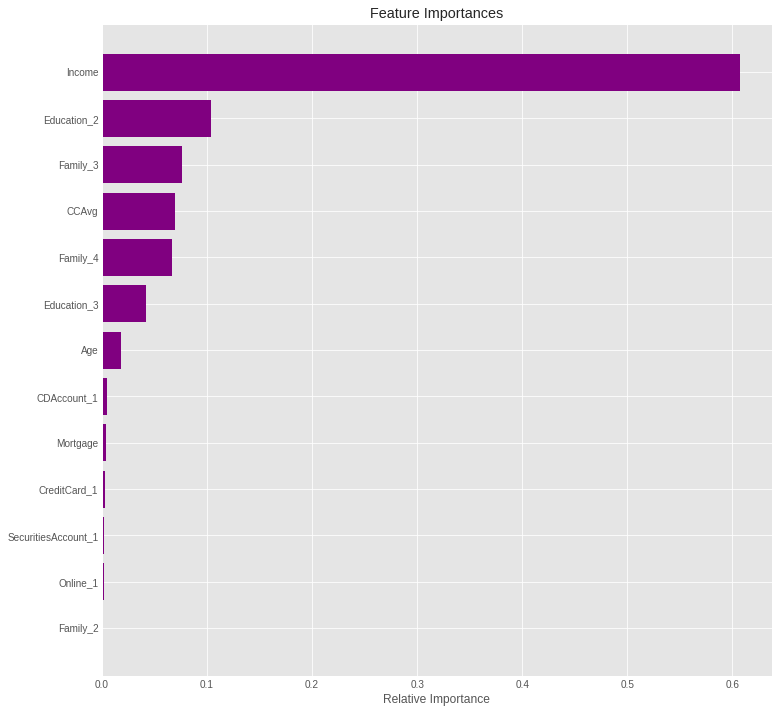

In [87]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_dt, y_train_dt)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
estimator



DecisionTreeClassifier(max_depth=6, max_leaf_nodes=30, min_samples_leaf=5,
                       random_state=1)

In [90]:
# Fit the best algorithm to the data. 
estimator.fit(X_train_dt, y_train_dt)
ytrain_predict=estimator.predict(X_train_dt)
ytest_predict=estimator.predict(X_test_dt)


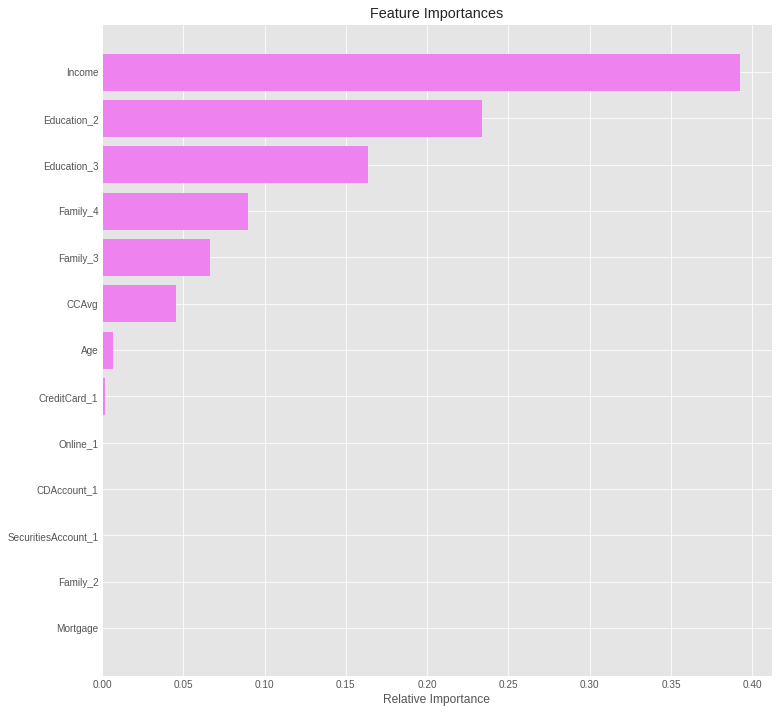

In [91]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



In [92]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train_dt, y_train_dt)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

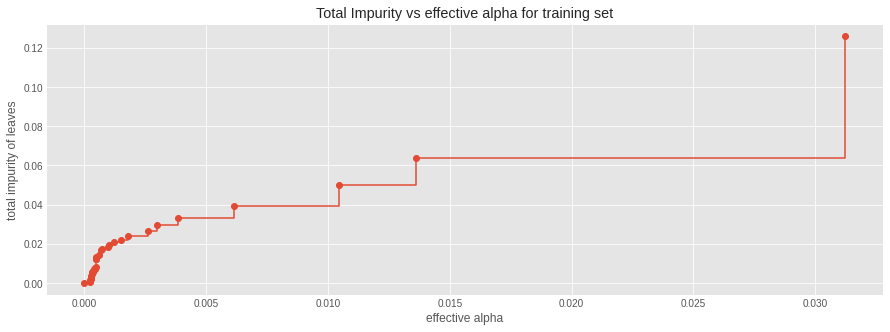

In [93]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()


In [94]:
clfs = []
accuracy_train=[]
accuracy_test=[]
recall_train=[]
recall_test=[]
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train_dt, y_train_dt)
    y_train_pred=clf.predict(X_train_dt)
    y_test_pred=clf.predict(X_test_dt)
    accuracy_train.append(clf.score(X_train_dt,y_train_dt))
    accuracy_test.append(clf.score(X_test_dt,y_test_dt))
    recall_train.append(metrics.recall_score(y_train_dt,y_train_pred))
    recall_test.append(metrics.recall_score(y_test_dt,y_test_pred))
    clfs.append(clf)

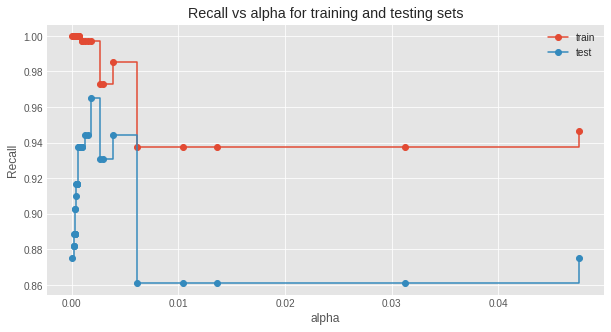

In [95]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [96]:
best_model = DecisionTreeClassifier(ccp_alpha=0.002,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
best_model.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

In [97]:
get_recall_score(best_model)

 Accuracy : Train : 0.9768571428571429  Test: 0.9686666666666667
 Recall   : Train : 0.9880952380952381  Test: 0.9583333333333334


In [98]:
from sklearn import tree

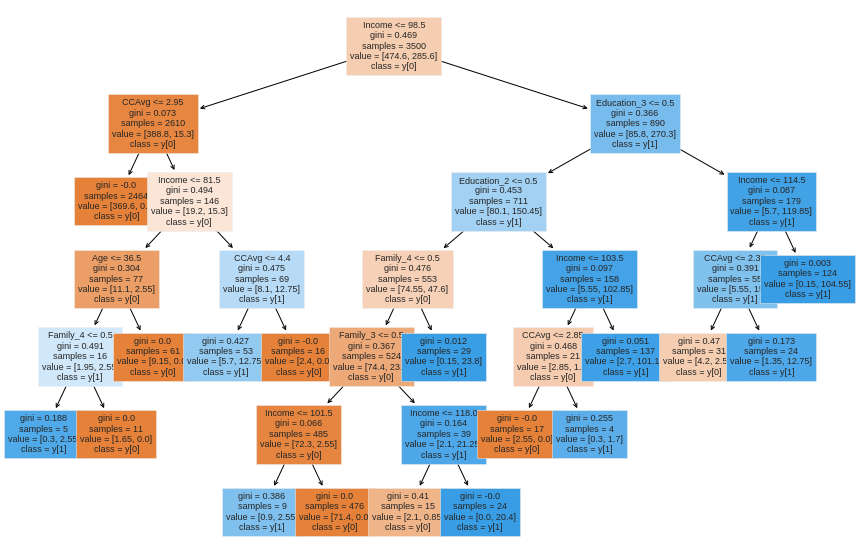

In [99]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

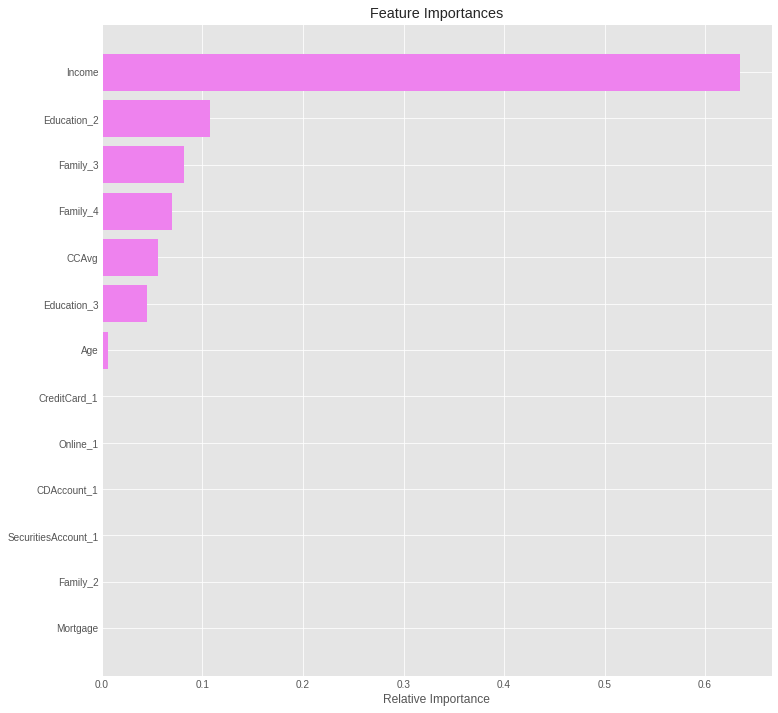

In [100]:


importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



In [101]:
comparison_frame = pd.DataFrame({'Model':['Logisitic Regression with Optimal Threshold 0.104',
                                          'Initial decision tree model',
                                          'Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 
                                          'Train_accuracy':[0.92,1,0.99,0.98],
                                          'Test_accuracy':[0.91,0.98,0.98,0.97],
                                          'Train_Recall':[0.90,1,0.92,0.98], 
                                          'Test_Recall':[0.88,0.86,0.84,0.96]})  

comparison_frame

,Model,Train_accuracy,Test_accuracy,Train_Recall,Test_Recall
0,Logisitic Regression with Optimal Threshold 0.104,0.92000,0.91000,0.90000,0.88000
1,Initial decision tree model,1.00000,0.98000,1.00000,0.86000
2,Decision treee with hyperparameter tuning,0.99000,0.98000,0.92000,0.84000
3,Decision tree with post-pruning,0.98000,0.97000,0.98000,0.96000
